# Load Dataset

In [144]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
train = pd.read_csv("train_bike.csv", parse_dates = ["datetime"])


# Explorer datetime

In [39]:
train["datetime-year"]=train["datetime"].dt.year
train["datetime-month"]=train["datetime"].dt.month
train["datetime-day"]=train["datetime"].dt.day
train["datetime-hour"]=train["datetime"].dt.hour
train["datetime-minute"]=train["datetime"].dt.minute
train["datetime-second"]=train["datetime"].dt.second

train[["datetime","datetime-year", "datetime-month", "datetime-day","datetime-hour","datetime-minute","datetime-second"]].head()

,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


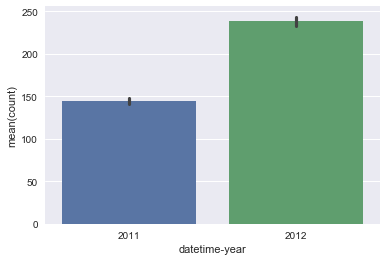

In [13]:
sns.barplot(data = train, x="datetime-year",y="count")

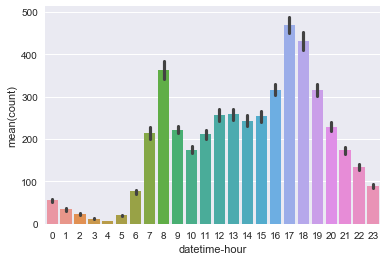

In [20]:
sns.barplot(data = train, x="datetime-hour",y="count")

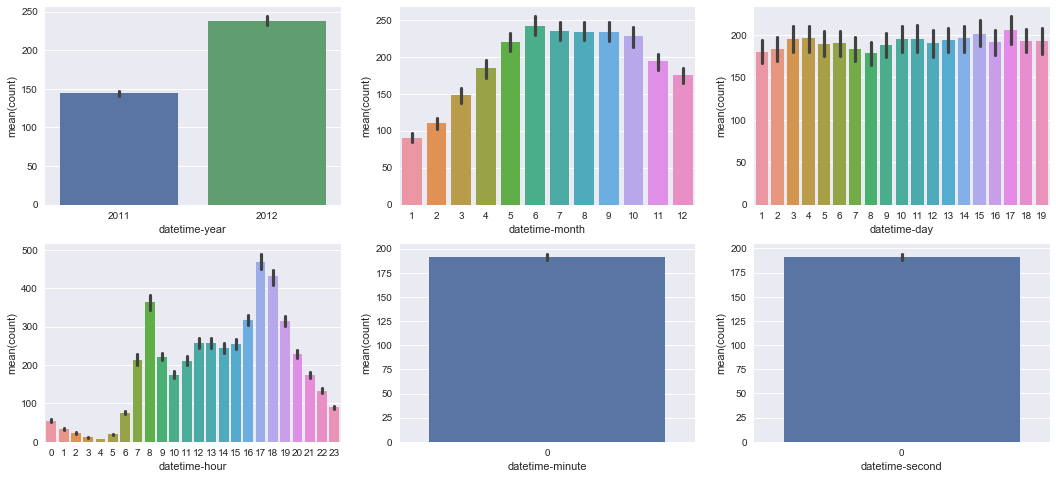

In [24]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data = train, x="datetime-year", y= "count",ax =ax1)
sns.barplot(data = train, x="datetime-month", y= "count",ax =ax2)
sns.barplot(data = train, x="datetime-day", y= "count",ax =ax3)
sns.barplot(data = train, x="datetime-hour", y= "count",ax =ax4)
sns.barplot(data = train, x="datetime-minute", y= "count",ax =ax5)
sns.barplot(data = train, x="datetime-second", y= "count",ax =ax6)

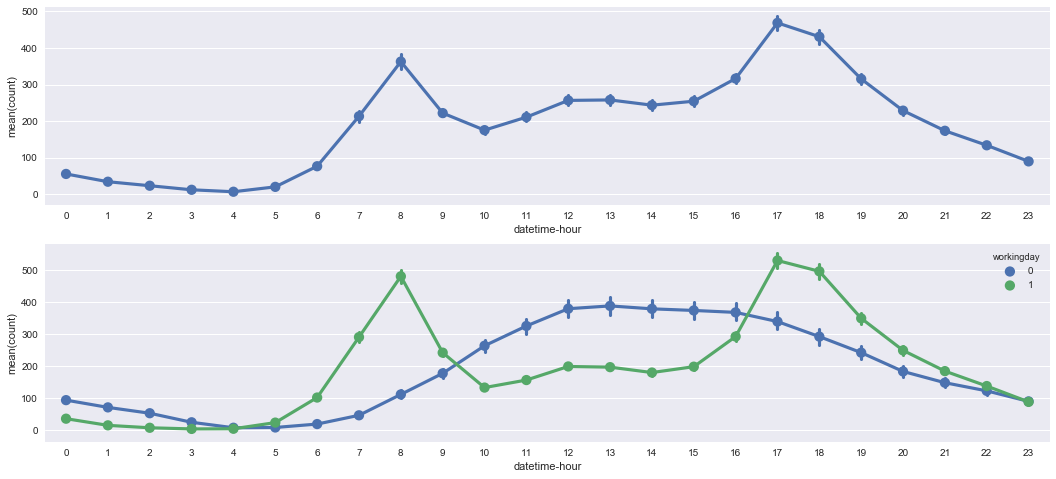

In [28]:
figure, (ax1, ax2) = plt.subplots(nrows= 2, ncols = 1)
figure.set_size_inches(18,8)

sns.pointplot(data = train, x = "datetime-hour", y="count", ax=ax1)
sns.pointplot(data = train, x = "datetime-hour", y="count", hue = "workingday", ax=ax2)

# Explore hour-dayofweek

In [30]:
train["datetime-dayofweek"]=train["datetime"].dt.dayofweek

In [33]:
train[["datetime","datetime-dayofweek"]].head()

,datetime,datetime-dayofweek
0,2011-01-01 00:00:00,5
1,2011-01-01 01:00:00,5
2,2011-01-01 02:00:00,5
3,2011-01-01 03:00:00,5
4,2011-01-01 04:00:00,5


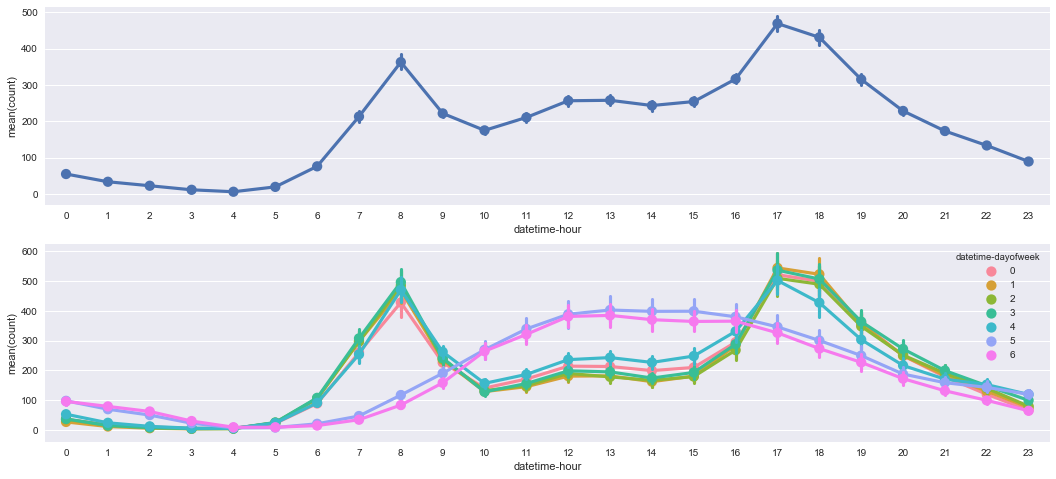

In [35]:
figure, (ax1, ax2) = plt.subplots(nrows= 2, ncols = 1)
figure.set_size_inches(18,8)

sns.pointplot(data = train, x = "datetime-hour", y="count", ax=ax1)
sns.pointplot(data = train, x = "datetime-hour", y="count", hue = "datetime-dayofweek", ax=ax2)

# Concatenate year and month

In [151]:
def concatenate_year_month(datetime):
    return "{0}{1:02d}".format(datetime.year,datetime.month)
#마스크 : 02d 00 형태로 입력
train["datetime-year_month"] = train["datetime"].apply(concatenate_year_month)

train[["datetime","datetime-year_month"]].head()

,datetime,datetime-year_month
0,2011-01-01 00:00:00,201101
1,2011-01-01 01:00:00,201101
2,2011-01-01 02:00:00,201101
3,2011-01-01 03:00:00,201101
4,2011-01-01 04:00:00,201101


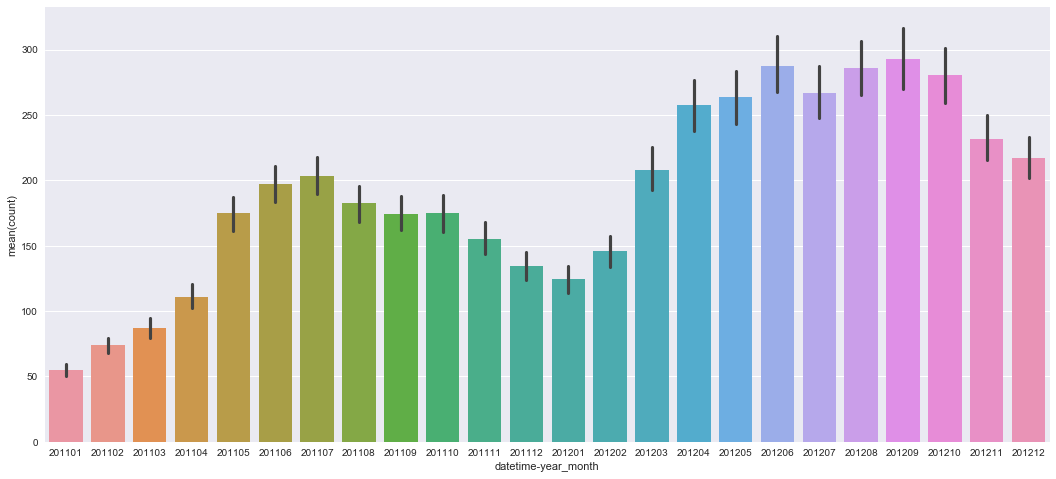

In [154]:
figure, (ax1) = plt.subplots(nrows= 1, ncols = 1)
figure.set_size_inches(18,8)

sns.barplot(data = train, x = "datetime-year_month", y="count", ax=ax1)

# Reload Dataset

In [155]:
train = pd.read_csv("train_bike.csv", parse_dates=["datetime"])
train["datetime-year"]=train["datetime"].dt.year
train["datetime-month"]=train["datetime"].dt.month
train["datetime-day"]=train["datetime"].dt.day
train["datetime-hour"]=train["datetime"].dt.hour
train["datetime-minute"]=train["datetime"].dt.minute
train["datetime-second"]=train["datetime"].dt.second
train["datetime-dayofweek"]=train["datetime"].dt.dayofweek

In [156]:
test = pd.read_csv("test_bike.csv", parse_dates=["datetime"])
test["datetime-year"]=test["datetime"].dt.year
test["datetime-month"]=test["datetime"].dt.month
test["datetime-day"]=test["datetime"].dt.day
test["datetime-hour"]=test["datetime"].dt.hour
test["datetime-minute"]=test["datetime"].dt.minute
test["datetime-second"]=test["datetime"].dt.second
test["datetime-dayofweek"]=test["datetime"].dt.dayofweek

In [157]:
train["datetime-year_month"] = train["datetime"].apply(concatenate_year_month)
test["datetime-year_month"] = test["datetime"].apply(concatenate_year_month)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek,datetime-year_month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5,201101
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5,201101
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5,201101
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5,201101
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5,201101


In [158]:
feature_names = ["season","holiday","workingday","weather","humidity","temperature","windspeed","datetime-hour","datetime-year_month","datetime-dayofweek"]
train["datetime-second"]=train["datetime"].dt.second
train["temperature"]=train["temp"]+train["atemp"]
test["temperature"]=test["temp"]+test["atemp"]
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek,datetime-year_month,temperature
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3,201101,22.025
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3,201101,24.295
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3,201101,24.295
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3,201101,23.540
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3,201101,23.540


# RMSLE

In [160]:
from sklearn.metrics import make_scorer
def rmsle(predict,actual):
    predict=np.array(predict)
    actual=np.array(actual)
    
    log_predict = np.log(predict+1)
    log_actual = np.log(actual+1)
    
    difference = log_predict-log_actual
    square_difference=difference**2
    mean_square_differnce = square_difference.mean()
    
    score=np.sqrt(mean_square_differnce)
    
    return score


rmsle_score=make_scorer(rmsle)
rmsle_score

make_scorer(rmsle)

# Hyper Parameters

In [179]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score

n_estimators =50
max_depth_list = [5,10,15,20,25,30,35,40,45,50]
max_features_list = [0.1,0.3,0.5,0.7,0.9]
hyperparameters_list = []

for max_depth in max_depth_list:
    for max_features in max_features_list:
        hyperModel = RandomForestRegressor (n_estimators = n_estimators, max_depth = max_depth,
                                       max_features = max_features, random_state=27, n_jobs =-1)
        cross_val_score(model, X_train, y_train, cv=20, scoring = rmsle_score).mean()
        hyperparameters_list.append({'score':score, 'n_estimators':n_estimators, 'max_depth':max_depth, 'max_features':max_features})
        
        print("Score={0:.5f}".format(score))

hyperparameters_list

Score=0.36164
Score=0.36164
Score=0.36164
Score=0.36164
Score=0.36164
Score=0.36164
Score=0.36164
Score=0.36164
Score=0.36164
Score=0.36164
Score=0.36164
Score=0.36164
Score=0.36164
Score=0.36164


KeyboardInterrupt: 

In [180]:
hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
hyperparameters_list = hyperparameters_list.sort_values(by="score")
print(hyperparameters_list.shape)
hyperparameters__list.head()

(14, 4)


NameError: name 'hyperparameters__list' is not defined

# Train

In [159]:
X_train= train[feature_names]
X_test = test[feature_names]
label_name = "count"
y_train = train[label_name]
y_train.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [161]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
for i in [24]:
    model_RF = RandomForestRegressor(max_depth=i, random_state=27, n_estimators=100, n_jobs=-1)
    score = cross_val_score(model_RF, X_train, y_train, cv = 20, scoring = rmsle_score).mean()
    print("{0:.3f}".format(score))


0.362


In [162]:
model_RF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=24,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=27,
           verbose=0, warm_start=False)

In [164]:
predict = model_RF.predict(X_test)
submission = pd.read_csv("bikeSampleSubmission.csv")
submission["count"]=predict
submission.head()
filename = "{0:5f}_bikeSubmission.csv".format(score)
submission.to_csv(filename, index = False)